# Implementation


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2


In [4]:
import sys
sys.path.append('/home/ssm-user/Github/memento')

In [5]:
import scanpy as sc
import scipy.stats as stats
import scipy.sparse as sparse
import pandas as pd
import numpy as np
import string
import random
import logging
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pymare import core, estimators


In [5]:
import memento

In [6]:
import memento.model.rna as rna
import memento.estimator.hypergeometric as hg

In [7]:
data_path = '/data_volume/memento/'

In [1]:
adata = sc.read(data_path + 'hbec/HBEC_type_I_filtered_counts_deep.h5ad')

NameError: name 'sc' is not defined

In [66]:
mean_filter = adata.X.mean(axis=0).A1>0.5
mt_filter  =~adata.var.index.str.contains('MT-')
gene_filter = mean_filter & mt_filter

In [67]:
adata = adata[
    (adata.obs['donor'] == 'd2513') &\
    adata.obs['stim'].isin(['control', 'beta']) & \
    adata.obs['cell_type'].isin(['ciliated']), gene_filter]

In [69]:
adata.write('toy_hbec.h5ad')

In [8]:
logging.basicConfig(
    format="%(asctime)s %(process)-7s %(levelname)-8s %(message)s",
    level=logging.INFO, 
    datefmt="%Y-%m-%d %H:%M:%S",
)
logging.captureWarnings(True)

### Check normality

In [38]:
adata = sc.read(data_path + 'hbec/HBEC_type_I_filtered_counts_deep.h5ad')
adata.obs['q'] = 0.07
rna.MementoRNA.setup_anndata(
    adata=adata,
    q_column='q',
    label_columns=['donor', 'stim'],
    num_bins=30)

# Define expressed genes
adata.var['expr_genes'] = (adata.X.mean(axis=0).A1 > 0.02)
adata = adata[:, adata.var['expr_genes']]



model = rna.MementoRNA(adata=adata)

2023-07-03 11:45:45 2115560 INFO     setup_anndata: creating groups
2023-07-03 11:45:45 2115560 INFO     setup_anndata: computing cell sizes


In [40]:
barcodes = adata.uns['memento']['group_barcodes']['memento_group^d2513^alpha']
genes = adata.var.index.tolist()

In [ ]:
for idx, gene in enumerate(genes):
    
    

In [30]:
x = stats.poisson.rvs(mu=5, size=1000)

In [31]:
stats.kstest(x, 'norm')

KstestResult(statistic=0.9422498680518208, pvalue=0.0, statistic_location=2, statistic_sign=-1)

### Read some data

In [9]:
adata = sc.read(data_path + 'hbec/HBEC_type_I_filtered_counts_deep.h5ad')
adata.obs['q'] = 0.07

2023-07-03 11:15:13 2115560 INFO     setup_anndata: creating groups
2023-07-03 11:15:13 2115560 INFO     setup_anndata: computing cell sizes


In [11]:
# Define expressed genes
adata.var['expr_genes'] = (adata.X.mean(axis=0).A1 > 0.02)
adata = adata[:, adata.var['expr_genes']]

In [26]:
model = rna.MementoRNA(adata=adata)

model.compute_estimate(
    estimand='mean',
    get_se=True,
    verbose=1,
    n_jobs=30,
)

2023-07-03 11:34:09 2115560 INFO     compute_estimate: running estimators for ['mean', 'log_mean', 'log1p_mean', 'se_mean', 'se_log_mean', 'se_log1p_mean', 'total_umi', 'cell_count']
2023-07-03 11:34:09 2115560 INFO     compute_estimate: gene_list is None, using all genes in AnnData object
2023-07-03 11:34:09 2115560 INFO     compute_estimate: getting estimates for memento_group^d2513^lambda using 30 parallel jobs
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 262 tasks      | elapsed:    0.6s
[Parallel(n_jobs=30)]: Done 1260 tasks      | elapsed:    2.8s
[Parallel(n_jobs=30)]: Done 1445 out of 1504 | elapsed:    3.2s remaining:    0.1s
[Parallel(n_jobs=30)]: Done 1504 out of 1504 | elapsed:    4.5s finished
2023-07-03 11:34:14 2115560 INFO     compute_estimate: getting estimates for memento_group^d2513^alpha using 30 parallel jobs
[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]

In [15]:
hi

In [61]:
np.mean([len(x) for x in hi]

3.9986702127659575

In [59]:
a, b, c, d = zip(*hi)

ValueError: not enough values to unpack (expected 4, got 2)

In [20]:
model.estimates['total_umi']

total_umi
memento_group^d2513^lambda   54640868.0
memento_group^d2513^alpha    61163952.0
memento_group^d2614^alpha    82624576.0
memento_group^d2614^gamma    62066392.0
memento_group^d2513^beta     68844056.0
memento_group^d2513^gamma    72729384.0
memento_group^d2614^lambda   63414112.0
memento_group^d2614^beta     77736736.0
memento_group^d2513^control   7276869.0
memento_group^d2614^control  13757338.0

### Bootstrapping vs WLS

In [ ]:
x1 = stats.norm.rvs(loc=5, scale=1, size=1000)
x2 = stats.norm.rvs(loc=2, scale=3, size=1000)

In [ ]:
dataset = core.Dataset(y=[x1.mean(), x2.mean()], X=[0, 1], v=[x1.var(), x2.var()])

In [ ]:
estimators.WeightedLeastSquares().fit_dataset(dataset).summary().to_df()

name  estimate        se   z-score       p-value  ci_0.025  ci_0.975
0  intercept  5.016460  1.013819  4.948083  7.494781e-07  3.029412  7.003509
1          0 -2.897297  3.148807 -0.920125  3.575073e-01 -9.068845  3.274252

In [ ]:
np.sqrt(x1.var()+x2.var())

3.148807069752963

In [ ]:
np.log(np.nan)

nan

In [ ]:
np.sqrt(1+3**2)

3.1622776601683795

### Bootstrap

In [ ]:
def unique_expr(expr, size_factor):
    """
        Find (approximately) unique combinations of expression values and size factors.
        The random component is for mapping (expr, size_factor) to a single number.
        This can certainly be performed more efficiently using sparsity.
    """

    code = expr.dot(np.random.random(expr.shape[1]))
    approx_sf = size_factor

    code += np.random.random() * approx_sf

    _, index, count = np.unique(code, return_index=True, return_counts=True)

    expr_to_return = expr[index].toarray()

    return (
        approx_sf[index].reshape(-1,1),
        1 / approx_sf[index].reshape(-1, 1), 
        1 / approx_sf[index].reshape(-1, 1) ** 2, 
        expr_to_return, 
        count)

In [ ]:
X = sparse.csc_matrix(np.random.randint(0, 100, size=(100, 10)))
size_factor = stats.poisson.rvs(1000, size=100)
n_obs = X.shape[0]

In [ ]:
sf, inverse_size_factor, inv_sf_sq, expr, counts = unique_expr(X, size_factor)
gen = np.random.Generator(np.random.PCG64(5))
gene_rvs = gen.multinomial(n_obs, counts / counts.sum(), size=100).T

In [ ]:
hi = [(1, 2), (3, 4), (5, 10)]


In [ ]:
x1 = (expr*gene_rvs*inverse_size_factor).sum(axis=0)/n_obs

In [ ]:
x2 = (expr*gene_rvs).sum(axis=0)/(sf*gene_rvs).sum(axis=0)

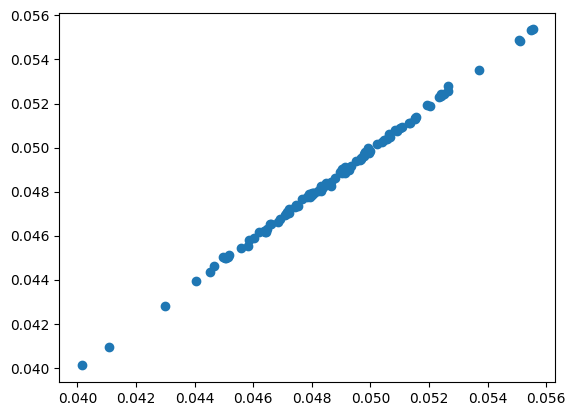

In [ ]:
plt.scatter(x1, x2)

In [ ]:
d

In [ ]:
d*e

array([[ 0,  0,  0, ...,  0,  0,  0],
       [12, 12, 12, ..., 12, 12, 12],
       [ 5,  5,  5, ...,  5,  5,  5],
       ...,
       [58, 58, 58, ..., 58, 58, 58],
       [87, 87, 87, ..., 87, 87, 87],
       [95, 95, 95, ..., 95, 95, 95]])

### Pseudobulk vs WLS vs LMM

In [ ]:
num_ind = 10
num_cell_per_ind = 100
beta_geno = 1
beta_age = 1
ind_intercepts = stats.norm.rvs(scale=2, size=num_ind)
ind_variances = np.exp(stats.norm.rvs(scale=1, size=num_ind))
intercept = 10
geno = np.array([0 for i in range(int(num_ind/2))] + [1 for i in range(int(num_ind/2))])
age = stats.norm.rvs(scale=10, loc=30, size=num_ind)

In [ ]:
num_trial = 50
num_effect_size = 20

lm_power = np.zeros(num_effect_size)
lmm_power = np.zeros(num_effect_size)
pseudobulk_power = np.zeros(num_effect_size)
wls_power = np.zeros(num_effect_size)
effect_sizes = np.linspace(0, 4, num_effect_size)

for jdx, effect_size in enumerate(effect_sizes):#enumerate(np.linspace(0.1, 2, num_effect_size)):
    
    print(jdx)
    lm_pv = np.zeros(num_trial)
    lmm_pv = np.zeros(num_trial)
    pseudob_pv = np.zeros(num_trial)
    wls_pv = np.zeros(num_trial)

    for idx in range(num_trial):

        data = []
        for ind in range(num_ind):
            mu = intercept+effect_size*geno[ind]+beta_age*age[ind]+ind_intercepts[ind]
            data.append(stats.norm.rvs(loc=mu, scale=np.sqrt(ind_variances[ind]), size=num_cell_per_ind))

        df = pd.DataFrame()
        df['expr'] = np.concatenate(data)
        df['geno'] = np.repeat(geno, num_cell_per_ind)
        df['age'] = np.repeat(age, num_cell_per_ind)
        df['ind'] = ['donor_' + str(x) for x in np.repeat(range(num_ind), num_cell_per_ind)]
        dummy_df = pd.get_dummies(df, drop_first=True)

        pseudobulks = df.groupby('ind').agg({'expr':['mean', 'var'], 'geno':'mean', 'age':'mean'})
        pseudobulks.columns = ['expr', 'var', 'geno', 'age']

        lm_pv[idx] = smf.ols("expr ~ geno + age", df).fit().pvalues['geno']
        lmm_pv[idx] = smf.mixedlm("expr ~ geno + age", df, groups=df["ind"]).fit().pvalues['geno']
        pb_model = smf.ols("expr ~ geno + age", pseudobulks).fit()
        pseudob_pv[idx] = pb_model.pvalues['geno']
        
        pseudobulks['var'] = pseudobulks['var']/num_cell_per_ind
        
        dsl = estimators.DerSimonianLaird()
        dsl.fit(
            y=pseudobulks[['expr']].values,
            X=sm.add_constant(pseudobulks[['age', 'geno']]).values,
            v=pseudobulks[['var']].values)
        wls_pv[idx] =float(dsl.summary().get_fe_stats()['p'][-1])
        
        
    lm_power[jdx] = (lm_pv < 0.05).mean()
    lmm_power[jdx] = (lmm_pv < 0.05).mean()
    pseudobulk_power[jdx] = (pseudob_pv < 0.05).mean()
    wls_power[jdx] = (wls_pv < 0.05).mean()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


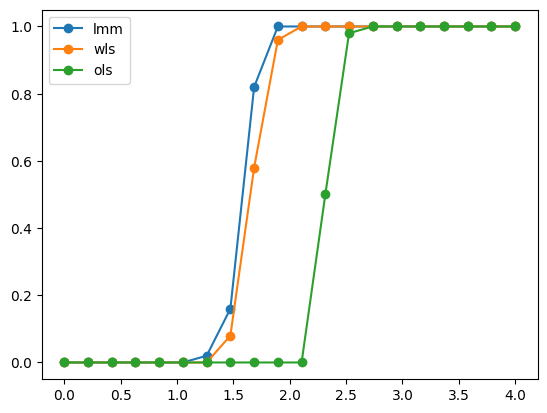

In [ ]:
plt.plot(effect_sizes, lmm_power, '-o', label='lmm')
plt.plot(effect_sizes, wls_power, '-o', label='wls')
plt.plot(effect_sizes, pseudobulk_power, '-o', label='ols')
plt.legend()

In [ ]:
dsl.summary().get_fe_stats()

[autoreload of memento.util failed: Traceback (most recent call last):
  File "/home/ssm-user/anaconda3/envs/single_cell/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/ssm-user/anaconda3/envs/single_cell/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/home/ssm-user/anaconda3/envs/single_cell/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/ssm-user/Github/memento/memento/util.py", line 113
    
    ^
Ind

{'est': array([[3.81191848],
        [1.18296308],
        [5.80263413]]),
 'se': array([[4.55873337],
        [0.13360197],
        [1.85588174]]),
 'ci_l': array([[-5.12303474],
        [ 0.92110804],
        [ 2.16517276]]),
 'ci_u': array([[12.74687171],
        [ 1.44481813],
        [ 9.4400955 ]]),
 'z': array([[0.8361793 ],
        [8.85438365],
        [3.12661847]]),
 'p': array([[0.40305404],
        [0.        ],
        [0.00176829]])}

Bad pipe message: %s [b'\xaa\xd7\xfc\x8e\xea\x9a\\\xa7S\x7f\xbc\x0f\x8b.\xb9{m\xed \xf2\xe6\xb2\x8eq\xdfB4\xfc\xc3\xc92R\xe75t]\xa6V!\x10\x97\x15B\xcf:8:\xef\x17\xce\x01\x00&\xc0+\xc0/\xc0,\xc00\xcc\xa9\xcc\xa8\xc0\t\xc0\x13\xc0\n\xc0\x14\x00\x9c\x00\x9d\x00/\x005\xc0\x12\x00\n\x13\x01']
Bad pipe message: %s [b'\x13\x03\x01\x00\x00\x89\x00\x00\x00\x0e\x00\x0c\x00\x00\tloc']
Bad pipe message: %s [b'host\x00\x05\x00\x05\x01\x00\x00\x00\x00\x00\n\x00\n\x00\x08\x00\x1d\x00\x17\x00\x18\x00\x19\x00\x0b\x00\x02\x01\x00\x00\r\x00\x1a\x00\x18\x08\x04\x04\x03\x08\x07\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x05\x03\x06\x03\x02\x01\x02\x03\xff\x01\x00\x01\x00\x00\x12\x00\x00\x00+\x00\x05\x04\x03\x04\x03\x03\x003\x00&\x00$\x00\x1d\x00 wg\x11\xa8E']


In [ ]:
pseudobulks

expr  geno        age
ind                                 
donor_0   46.831113   0.0  38.808083
donor_1   33.255335   0.0  20.637847
donor_10  57.820048   1.0  43.362017
donor_11  34.107427   1.0  17.284894
donor_12  45.045919   1.0  34.394089
donor_13  39.041103   1.0  32.189609
donor_14  29.987195   1.0  19.958391
donor_15  37.665257   1.0  23.605144
donor_16  53.365008   1.0  42.333040
donor_17  66.360784   1.0  50.351849
donor_18  46.825043   1.0  37.588144
donor_19  44.643357   1.0  31.126679
donor_2   14.502516   0.0   5.400457
donor_3   23.596018   0.0  18.157326
donor_4   34.350365   0.0  26.605003
donor_5   39.536529   0.0  30.598054
donor_6   34.999494   0.0  24.258270
donor_7   27.877703   0.0  16.413917
donor_8   39.630351   0.0  30.322579
donor_9   32.271809   0.0  22.717091

In [ ]:
%%time

# actually bootstrap everything

lmm_result = []
boot_result = []

for univ in range(1):
    
    # Parameter generation
    num_ind = 20
    num_cell_per_ind = 1000
    beta_geno = 1
    beta_age = 1
    ind_intercepts = stats.norm.rvs(scale=2, size=num_ind)
    intercept = 10
    geno = np.array([0 for i in range(int(num_ind/2))] + [1 for i in range(int(num_ind/2))])
    age = stats.norm.rvs(scale=10, loc=30, size=num_ind)
    
    # Data generation
    data = []
    for ind in range(num_ind):
        mu = intercept+beta_geno*geno[ind]+beta_age*age[ind]+ind_intercepts[ind]
        data.append(stats.norm.rvs(loc=mu, scale=1, size=num_cell_per_ind))

    df = pd.DataFrame()
    df['expr'] = np.concatenate(data)
    df['geno'] = np.repeat(geno, num_cell_per_ind)
    df['age'] = np.repeat(age, num_cell_per_ind)
    df['ind'] = ['donor_' + str(x) for x in np.repeat(range(num_ind), num_cell_per_ind)]
    dummy_df = pd.get_dummies(df, drop_first=True)

    #LMM
    lmm_result.append(smf.mixedlm("expr ~ geno + age", df, groups=df["ind"]).fit())
    
    # bootstrap
    num_boot = 100
    b_coefs = np.zeros(num_boot)
    for b in range(num_boot):
        b_donors = np.random.choice(num_ind, size=num_ind)
        genos = []
        exprs = []
        ages = []
        for d in b_donors:
            genos.append(np.ones(num_cell_per_ind)*int(d >= num_ind/2))
            b_idxs = np.random.choice(num_cell_per_ind, size=num_cell_per_ind)
            exprs.append(df.query('ind.str.contains("{}")'.format(d), engine='python').expr.values[b_idxs])
            ages.append(np.ones(num_cell_per_ind)*age[d])

        genos = np.concatenate(genos)
        exprs = np.concatenate(exprs)
        ages = np.concatenate(ages)
        b_coefs[b] = LinearRegression().fit(np.vstack([genos, ages]).T, exprs).coef_[0]
    boot_result.append(b_coefs)

CPU times: user 12.7 s, sys: 1.12 s, total: 13.9 s
Wall time: 12.6 s


In [ ]:
pseudobulks = df.groupby(['ind', 'geno', 'age']).agg({'expr':['mean', 'var']}).reset_index()
pseudobulks.columns = ['ind', 'geno', 'age', 'mean', 'var']


In [ ]:
smf.mixedlm("expr ~ geno + age", df, groups=df["ind"]).fit().summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: expr       
No. Observations: 20000   Method:             REML       
No. Groups:       20      Scale:              0.9938     
Min. group size:  1000    Log-Likelihood:     -28404.1178
Max. group size:  1000    Converged:          Yes        
Mean group size:  1000.0                                 
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   9.604     1.738   5.527  0.000   6.198  13.010
geno        0.950     1.374   0.692  0.489  -1.742   3.642
age         0.986     0.065  15.292  0.000   0.860   1.113
Group Var   7.423     2.487                               
=========================================================

"""

In [ ]:
smf.ols('mean~geno+age', pseudobulks).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     150.8
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           1.52e-11
Time:                        00:07:16   Log-Likelihood:                -47.078
No. Observations:                  20   AIC:                             100.2
Df Residuals:                      17   BIC:                             103.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6039      1.762      5.451      0.000       5.887      13.321
geno           0.9503      1.393      0.682      0.504      -1.988       3.889
age            0.9864      0.065     15.081      0.000       0.848       1.124
==============================================================================
Omnibus:                        0.213   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.385
Skew:                          -0.178   Prob(JB):                        0.825
Kurtosis:                       2.421   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
smf.wls('mean~geno+age', pseudobulks, weights=1/pseudobulks['var']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.956
Model:                            WLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     185.8
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           2.80e-12
Time:                        00:06:02   Log-Likelihood:                -43.876
No. Observations:                  20   AIC:                             93.75
Df Residuals:                      17   BIC:                             96.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8316      1.973      5.996      0.000       7.668      15.995
geno          -0.8917      1.067     -0.836      0.415      -3.142       1.359
age            0.9826      0.052     18.865      0.000       0.873       1.093
==============================================================================
Omnibus:                        0.730   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.758
Skew:                          -0.308   Prob(JB):                        0.685
Kurtosis:                       2.272   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
np.mean(boot_result[0])

1.0120044603239813

In [ ]:
np.std(boot_result[0])

0.6294694268678616

In [ ]:
lmm_result[0].bse['geno']

0.5967784298460402

### Perturbseq

In [ ]:
adata = sc.read(data_path + 'tfko140/tfko.sng.guides.full.ct.details.h5ad')

Only considering the two last: ['.details', '.h5ad'].
Only considering the two last: ['.details', '.h5ad'].


In [ ]:
guide_pairs = pd.read_csv('guide_pairs_to_test.csv')

NameError: name 'pd' is not defined

In [ ]:
rna.MementoRNA.setup_anndata(
    adata=adata,
    q_column='q',
    label_columns=['donor', 'guide'])

2023-06-29 15:08:54 2997726 INFO     setup_anndata: creating groups
2023-06-29 15:09:18 2997726 INFO     setup_anndata: computing cell sizes


In [ ]:
# Define expressed genes
adata.var['expr_genes'] = (adata.X.mean(axis=0).A1 > 0.1)
adata = adata[:, adata.var['expr_genes']]

2023-06-29 15:09:29 2997726 WARNING  /tmp/ipykernel_2997726/1251293065.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['expr_genes'] = (adata.X.mean(axis=0).A1 > 0.1)



In [ ]:
model = rna.MementoRNA(adata=adata)

In [ ]:
model.compute_estimate(
    estimator=[
        'mean', 
        'sem', 
        'var', 
        'total_umi',
        'cell_count'])

2023-06-29 15:10:27 2997726 INFO     compute_estimate: gene_list is None, using all genes...


In [ ]:
for idx, row in guide_pairs.iterrows():
    
    sets = [(row['target1_guide1'], row['target2_guide1']), (row['target1_guide2'], row['target2_guide2'])]
    for t1, t2 in sets:
        

        groups = [f'memento_group^{d}^{g}' for d,g in itertools.product(donors, [t1,t2])]
        treatment = pd.DataFrame(index=groups)
        covariate = pd.DataFrame(index=groups)
        treatment['is_target1'] = treatment.index.str.contains(t1).astype(float)
        covariate['donor'] = covariate.index.str.split('^').str[1]
        covariate = pd.get_dummies(covariate, drop_first=True).astype(float)
        covariate = sm.add_constant(covariate)
        
        result = model.differential_mean(covariates=covariate, treatments=treatment, family='NB')
        break
    break

NameError: name 'model' is not defined

In [ ]:
alpha

63363.200169352494

In [ ]:
len(groups)

18

In [ ]:
model.differential_mean(

In [103]:
model.estimates['log1p_mean']

HES4     ISG15  AURKAIP1    MRPL20     SSU72   
memento_group^d2513^lambda   1.481903  2.918035  1.248124  1.151114  0.796047  \
memento_group^d2513^alpha    2.059117  4.531693  1.168273  1.111109  0.741488   
memento_group^d2614^alpha    2.279935  4.619538  1.193438  1.117366  0.726243   
memento_group^d2614^gamma    1.527547  2.416112  1.215534  1.144783  0.778665   
memento_group^d2513^beta     2.121771  4.622133  1.168793  1.114753  0.752678   
memento_group^d2513^gamma    1.405700  2.301020  1.214456  1.148358  0.798161   
memento_group^d2614^lambda   1.597442  2.729882  1.230191  1.137909  0.789010   
memento_group^d2614^beta     2.316380  4.655024  1.230592  1.143457  0.766699   
memento_group^d2513^control  1.425426  1.867707  1.488410  1.388584  0.937817   
memento_group^d2614^control  1.470167  1.360531  1.232004  1.098020  0.813108   

                               FAAP20      RER1     RPL22    CAMTA1     PARK7   
memento_group^d2513^lambda   0.688903  0.799036  2.311397  0.662609  1.389984  \
memento_group^d2513^alpha    0.638318  0.797022  2.218033  0.661000  1.318972   
memento_group^d2614^alpha    0.660516  0.794383  2.226239  0.702266  1.438239   
memento_group^d2614^gamma    0.699331  0.753857  2.258028  0.735618  1.490730   
memento_group^d2513^beta     0.640534  0.802262  2.212368  0.649799  1.310345   
memento_group^d2513^gamma    0.693603  0.784411  2.329350  0.720761  1.390215   
memento_group^d2614^lambda   0.704557  0.752297  2.319340  0.695194  1.483711   
memento_group^d2614^beta     0.648228  0.833913  2.174193  0.690152  1.471686   
memento_group^d2513^control  0.737072  1.033393  2.157089  0.781320  1.586062   
memento_group^d2614^control  0.726020  0.751950  2.369987  0.741605  1.506803   

                             ...    MT-CO1    MT-CO2   MT-ATP6    MT-CO3   
memento_group^d2513^lambda   ...  4.781543  5.035557  4.306277  4.669350  \
memento_group^d2513^alpha    ...  4.724957  4.963626  4.107903  4.580826   
memento_group^d2614^alpha    ...  4.855021  4.978246  4.282140  4.653388   
memento_group^d2614^gamma    ...  5.062633  5.125339  4.632171  5.006990   
memento_group^d2513^beta     ...  4.687493  4.919380  4.055368  4.524850   
memento_group^d2513^gamma    ...  4.864451  5.040166  4.373682  4.833792   
memento_group^d2614^lambda   ...  5.013710  5.120471  4.606475  4.933447   
memento_group^d2614^beta     ...  4.876392  4.999774  4.344670  4.667187   
memento_group^d2513^control  ...  4.761413  5.135210  4.395092  4.658176   
memento_group^d2614^control  ...  5.067929  5.131412  4.697723  5.087352   

                               MT-ND3   MT-ND4L    MT-ND4    MT-ND5    MT-ND6   
memento_group^d2513^lambda   4.196213  1.207645  3.880316  2.682342  1.129243  \
memento_group^d2513^alpha    3.985490  1.171700  3.737851  2.632713  1.206280   
memento_group^d2614^alpha    4.022501  1.308636  4.025741  2.842001  1.150923   
memento_group^d2614^gamma    4.357939  1.408000  4.307337  3.069828  1.045186   
memento_group^d2513^beta     3.964976  1.138075  3.677466  2.583838  1.219998   
memento_group^d2513^gamma    4.161624  1.204392  3.926482  2.706519  1.129734   
memento_group^d2614^lambda   4.308293  1.388678  4.272579  3.020408  1.039154   
memento_group^d2614^beta     4.078002  1.316179  4.058073  2.875399  1.144918   
memento_group^d2513^control  4.412241  1.302026  3.940993  3.078026  1.073105   
memento_group^d2614^control  4.321922  1.412703  4.341297  3.096590  0.973742   

                               MT-CYB  
memento_group^d2513^lambda   4.219916  
memento_group^d2513^alpha    4.000984  
memento_group^d2614^alpha    4.070645  
memento_group^d2614^gamma    4.464017  
memento_group^d2513^beta     3.934374  
memento_group^d2513^gamma    4.294661  
memento_group^d2614^lambda   4.453143  
memento_group^d2614^beta     4.111324  
memento_group^d2513^control  4.358509  
memento_group^d2614^control  4.565712  

[10 rows x 1504 columns]

In [97]:
'se_log_var'.split('se_')[-1]

'log_var'

In [96]:
expr = model.estimates['mean']*model.estimates['total_umi'].values
expr_se = model.estimates['sem']*model.estimates['cell_count'].values**2

# Transform standard error to weights
weights = np.sqrt(1/expr_se).replace([-np.inf, np.inf], np.nan)
mean_weight = np.nanmean(weights)
weights /= mean_weight
weights = weights.fillna(1.0)


In [102]:
design_matrix = pd.DataFrame(
    stats.bernoulli.rvs(size=len(adata.uns['memento']['groups']), p=0.5),
    index=adata.uns['memento']['groups'],
    columns=['treatment'])
design_matrix['intercept'] = 1

In [141]:
def fit_nb(endog, exog, offset, weights=None):
    
    poi = sm.GLM(
        endog,
        exog, 
        offset=offset,
        var_weights=weights,
        family=sm.families.Poisson()).fit()

    mu = poi.predict()
    resid = poi.resid_response
    df_resid=poi.df_resid

    alpha = ((resid**2 / mu - 1) / mu).sum() / df_resid
    
    nb = sm.GLM(
        endog,
        exog, 
        offset=offset,
        var_weights=weights,
        family=sm.families.NegativeBinomial(alpha=alpha))\
        .fit(start_params=poi.params)
    
    return nb

In [142]:
fit_nb(
    expr.iloc[:, [idx]],
    design_matrix, 
    np.log(model.estimates['total_umi']['total_umi'].values),
    weights.iloc[:, idx]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              LINC01409   No. Observations:                   10
Model:                            GLM   Df Residuals:                        8
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66.919
Date:                Wed, 28 Jun 2023   Deviance:                       9.4006
Time:                        22:31:43   Pearson chi2:                     9.37
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2345
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment      0.1371      0.083      1.646      0.100      -0.026       0.300
intercept    -11.7864      0.053   -222.744      0.000     -11.890     -11.683
==============================================================================
"""

In [143]:
%%time



poi = sm.GLM(
    expr.iloc[:, [idx]],
    design_matrix, 
    offset=np.log(model.estimates['total_umi']['total_umi'].values),
    var_weights=weights.iloc[:, idx],
    family=sm.families.Poisson()).fit()

mu = poi.predict()
resid = poi.resid_response
df_resid=poi.df_resid

alpha = ((resid**2 / mu - 1) / mu).sum() / df_resid
nb = sm.GLM(
    expr.iloc[:, [idx]],
    design_matrix, 
    offset=np.log(model.estimates['total_umi']['total_umi'].values),
    var_weights=weights.iloc[:, idx],
    family=sm.families.NegativeBinomial(alpha=alpha))\
    .fit(start_params=poi.params)

CPU times: user 3.31 ms, sys: 3.77 ms, total: 7.08 ms
Wall time: 6.63 ms


In [113]:
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              LINC01409   No. Observations:                   10
Model:                            GLM   Df Residuals:                        8
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -87.940
Date:                Wed, 28 Jun 2023   Deviance:                      0.20952
Time:                        22:20:05   Pearson chi2:                    0.204
No. Iterations:                     5   Pseudo R-squ. (CS):           0.008176
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment      0.1621      0.567      0.286      0.775      -0.950       1.274
intercept    -11.7785      0.370    -31.869      0.000     -12.503     -11.054
==============================================================================
"""

In [110]:
design_matrix

treatment  intercept
memento_group^d2513^lambda           1          1
memento_group^d2513^alpha            0          1
memento_group^d2614^alpha            0          1
memento_group^d2614^gamma            0          1
memento_group^d2513^beta             1          1
memento_group^d2513^gamma            0          1
memento_group^d2614^lambda           0          1
memento_group^d2614^beta             1          1
memento_group^d2513^control          1          1
memento_group^d2614^control          0          1

In [48]:
expr

LINC01409   LINC01128      FAM41C        NOC2L   
memento_group^d2513^lambda   616.464050  415.312622  299.225250  2116.593262  \
memento_group^d2513^alpha    562.351196  349.009827  188.486038  2024.671387   
memento_group^d2614^alpha    749.359253  414.262268  233.158081  2785.968018   
memento_group^d2614^gamma    621.043030  364.456940  220.978195  2160.559326   
memento_group^d2513^beta     626.418396  349.388489  239.816940  2135.611328   
memento_group^d2513^gamma    720.975708  463.049194  352.364197  2634.100098   
memento_group^d2614^lambda   650.988586  420.364655  284.086823  2428.889893   
memento_group^d2614^beta     802.833252  406.427368  246.083405  2566.616455   
memento_group^d2513^control  111.890884   60.421078   89.512711   275.251587   
memento_group^d2614^control  153.860382  103.988388   77.460739   541.164062   

                                 KLHL17      PLEKHN1  AL645608.7   
memento_group^d2513^lambda   227.171005   905.681763  386.290771  \
memento_group^d2513^alpha    214.376968  1638.378662  534.388977   
memento_group^d2614^alpha    232.073624  2112.520752  488.005280   
memento_group^d2614^gamma    186.417633  1035.769897  316.281586   
memento_group^d2513^beta     196.401810  1567.079834  629.519531   
memento_group^d2513^gamma    264.019287  1160.669312  553.425049   
memento_group^d2614^lambda   234.817169   984.345154  366.901794   
memento_group^d2614^beta     236.061920  1772.691284  411.994843   
memento_group^d2513^control   36.923992    90.631615   15.664724   
memento_group^d2614^control   67.910782   215.404526  115.660561   

                                     HES4         ISG15         AGRN  ...   
memento_group^d2513^lambda   26673.078125  1.372773e+05  2995.254639  ...  \
memento_group^d2513^alpha    58378.890625  7.846166e+05  4438.742676  ...   
memento_group^d2614^alpha    98711.546875  1.129824e+06  5374.565430  ...   
memento_group^d2614^gamma    30780.902344  8.706751e+04  2537.583740  ...   
memento_group^d2513^beta     70510.320312  9.666938e+05  4759.125977  ...   
memento_group^d2513^gamma    31323.855469  9.142176e+04  3099.180176  ...   
memento_group^d2614^lambda   34616.664062  1.259029e+05  2989.725586  ...   
memento_group^d2614^beta     97571.515625  1.111560e+06  5648.783203  ...   
memento_group^d2513^control   3476.449707  6.023086e+03   441.969025  ...   
memento_group^d2614^control   6349.658691  5.493346e+03   499.780945  ...   

                                  MT-ND4L         MT-ND4         MT-ND5   
memento_group^d2513^lambda   18393.845703  372033.031250  106805.398438  \
memento_group^d2513^alpha    19013.269531  350050.687500  110214.617188   
memento_group^d2614^alpha    30381.041016  618881.812500  181654.015625   
memento_group^d2614^gamma    26350.865234  625070.875000  175277.609375   
memento_group^d2513^beta     20355.498047  369992.062500  117563.015625   
memento_group^d2513^gamma    23756.658203  506021.375000  142226.171875   
memento_group^d2614^lambda   26438.945312  621180.500000  171310.656250   
memento_group^d2614^beta     29136.943359  607100.000000  178645.421875   
memento_group^d2513^control   2944.968018   55547.113281   22798.886719   
memento_group^d2614^control   5889.138184  143710.890625   40041.898438   

                                   MT-ND6         MT-CYB  AL354822.1   
memento_group^d2513^lambda   16415.357422  525649.687500  238.179291  \
memento_group^d2513^alpha    19982.626953  457985.843750  221.626434   
memento_group^d2614^alpha    24307.001953  647822.687500  254.847214   
memento_group^d2614^gamma    15735.532227  732543.812500  205.268860   
memento_group^d2513^beta     22912.857422  481184.468750  253.254959   
memento_group^d2513^gamma    21315.496094  735781.125000  268.081116   
memento_group^d2614^lambda   16048.285156  745846.312500  205.465012   
memento_group^d2614^beta     22870.167969  640889.187500  234.948425   
memento_group^d2513^control   2116.975586   84901.687500   32.448357   
mement

In [47]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              LINC01409   No. Observations:                   10
Model:                            GLM   Df Residuals:                        8
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                 0.0000
Date:                Wed, 28 Jun 2023   Deviance:                       0.0000
Time:                        22:03:51   Pearson chi2:                     0.00
No. Iterations:                     1   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment           0          0        nan        nan           0           0
intercept           0          0        nan        nan           0           0
==============================================================================
"""

In [8]:
import statsmodels.api as sm

In [9]:
import statsmodels.discrete.discrete_model as discrete

In [85]:
X = np.array([0, 0, 0, 0,0, 0, 1, 1, 1, 1, 1,1]).reshape(-1,1)
X = sm.add_constant(X)
beta = np.array([1, 2]).reshape(-1, 1)
Y = stats.poisson.rvs(np.exp(X@beta))

In [86]:
%%time
discrete.NegativeBinomial(endog=Y, exog=X).fit().summary()

Optimization terminated successfully.
         Current function value: 2.542510
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
CPU times: user 20 ms, sys: 7.92 ms, total: 27.9 ms
Wall time: 15.1 ms


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:               NegativeBinomial   Df Residuals:                       10
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Jun 2023   Pseudo R-squ.:                  0.2902
Time:                        17:30:44   Log-Likelihood:                -30.510
converged:                       True   LL-Null:                       -42.985
Covariance Type:            nonrobust   LLR p-value:                 5.882e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1527      0.229      5.024      0.000       0.703       1.602
x1             1.9534      0.245      7.968      0.000       1.473       2.434
alpha       1.392e-05      0.031      0.000      1.000      -0.061       0.061
==============================================================================
"""

In [83]:
%%time
weights = stats.norm.rvs(loc=10, scale=2,size=12)
weights /= weights.mean()
weighted_model = sm.GLM(endog=Y, exog=X, family=sm.families.Poisson(), var_weights=weights).fit()
weighted_model.summary()

CPU times: user 4.34 ms, sys: 0 ns, total: 4.34 ms
Wall time: 3.94 ms


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:                            GLM   Df Residuals:                       10
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.868
Date:                Wed, 28 Jun 2023   Deviance:                       7.2673
Time:                        17:26:39   Pearson chi2:                     6.99
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9995
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0173      0.252      4.032      0.000       0.523       1.512
x1             2.0166      0.267      7.554      0.000       1.493       2.540
==============================================================================
"""

In [84]:
%%time
weights = stats.norm.rvs(loc=10, scale=2,size=12)
weights /= weights.mean()
weighted_model = sm.GLM(endog=Y, exog=X, family=sm.families.NegativeBinomial(), var_weights=weights).fit()
weighted_model.summary()

CPU times: user 485 µs, sys: 4.4 ms, total: 4.89 ms
Wall time: 4.45 ms


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:                            GLM   Df Residuals:                       10
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36.263
Date:                Wed, 28 Jun 2023   Deviance:                       1.6960
Time:                        17:26:40   Pearson chi2:                     1.63
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5707
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8993      0.476      1.888      0.059      -0.034       1.833
x1             2.1066      0.639      3.299      0.001       0.855       3.358
==============================================================================
"""

In [72]:
sm.GLM(endog=Y, exog=X, family=sm.families.NegativeBinomial()).loglike(weighted_model.params)

-37.159871451123635

In [69]:
weighted_model.loglike

### Generate multi-index Pandas DataFrame

In [ ]:
adata

AnnData object with n_obs × n_vars = 69958 × 36601
    obs: 'NUM.SNPS', 'BEST.GUESS', 'DROPLET.TYPE', 'batch', 'HTO_classification', 'condition', 'donor', 'stim', 'time', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### Toy HBEC dataset

In [1]:
adata = sc.read(data_path + 'hbec/HBEC_type_I_filtered_counts_deep.h5ad')

NameError: name 'sc' is not defined

In [66]:
mean_filter = adata.X.mean(axis=0).A1>0.5
mt_filter  =~adata.var.index.str.contains('MT-')
gene_filter = mean_filter & mt_filter

In [67]:
adata = adata[
    (adata.obs['donor'] == 'd2513') &\
    adata.obs['stim'].isin(['control', 'beta']) & \
    adata.obs['cell_type'].isin(['ciliated']), gene_filter]

In [69]:
adata.write('toy_hbec.h5ad')